In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sys
import os
import unicodedata
import numpy as np
import pandas as pd
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
import seaborn as sns
import scipy.stats as stats
sns.set(font_scale=1)
sns.set_style("white")
sns.set_style("ticks")
import plotly.express as px
from geopy.geocoders import Nominatim
import unicodedata
import time
from tqdm import tqdm
import re
from googletrans import Translator
import io
import msoffcrypto
import googlemaps
from starlette.config import Config

config = Config("../../../../../.env")
pw = config("HASEKO_DATA_PW", cast=str)
translator = Translator()
# gmaps = googlemaps.Client(key=googleapikey)

# Buyers data

In [4]:
data_dir = '../data/ローデータ 240207ご提出v1.0.xls'
df = pd.read_excel(data_dir)
df.columns = [unicodedata.normalize('NFKC', s) for s in df.columns]
df.columns = [s+'\n'+str(translator.translate(s, dest='en').text) for s in df.columns]

df.iloc[:,-1] = [unicodedata.normalize('NFKC', s) for s in df.iloc[:,-1]]
df['age_bin'] = [re.sub("[^0-9]", "", s) for s in df.iloc[:,2]]

df.head()

,提供NO.1\nProvide NO.1,家族F\nFamily F,年齢F(10歳刻)\nAge F (10 years old),合算後年収(百万円)\nAnnual income after the sum (million yen),物件価格(百万円単位)\nProperty price (million yen units),部屋面積(m2)\nHouse area (M2),最新住所\nLatest address,age_bin
0,100001,ファミリー,～40歳,10,48.00,65.01,さいたま市浦和区 上木崎 1-2-24,40
1,100002,ファミリー,～30歳,10,48.00,65.01,さいたま市浦和区 上木崎 1-2-24,30
2,100003,DINKS,～40歳,8,32.98,35.73,さいたま市浦和区 上木崎 1-9-17 シティインデックス 与野駅前,40
3,100004,独身,～30歳,5,30.80,35.73,さいたま市浦和区 上木崎 1-9-17 シティインデックス 与野駅前,30
4,100005,独身,～50歳,4,33.78,35.73,さいたま市浦和区 上木崎 1-9-17 シティインデックス 与野駅前,50


In [5]:
# loc = Nominatim(user_agent="Geopy Library")
# loc_lat_lon = {}
# for idx, address in enumerate(tqdm(np.unique(df['最新住所']))):
#     try:
#         getLoc = loc.geocode(address)
#         loc_lat_lon[address] = {'lat':getLoc.latitude, 'lon':getLoc.longitude}
#     except:
#         loc_lat_lon[address] = {'lat':-1, 'lon':-1}
#     time.sleep(1)
# df['latitude'] = [loc_lat_lon[i]['lat'] for i in df['最新住所']]
# df['longitude'] = [loc_lat_lon[i]['lon'] for i in df['最新住所']]

# df.head()
# fig = px.density_mapbox(df_map, lat='latitude', lon='longitude', z='物件価格（百万円単位）', radius=8, zoom=10, mapbox_style='open-street-map', width=1000, height=1000)
# fig.show()

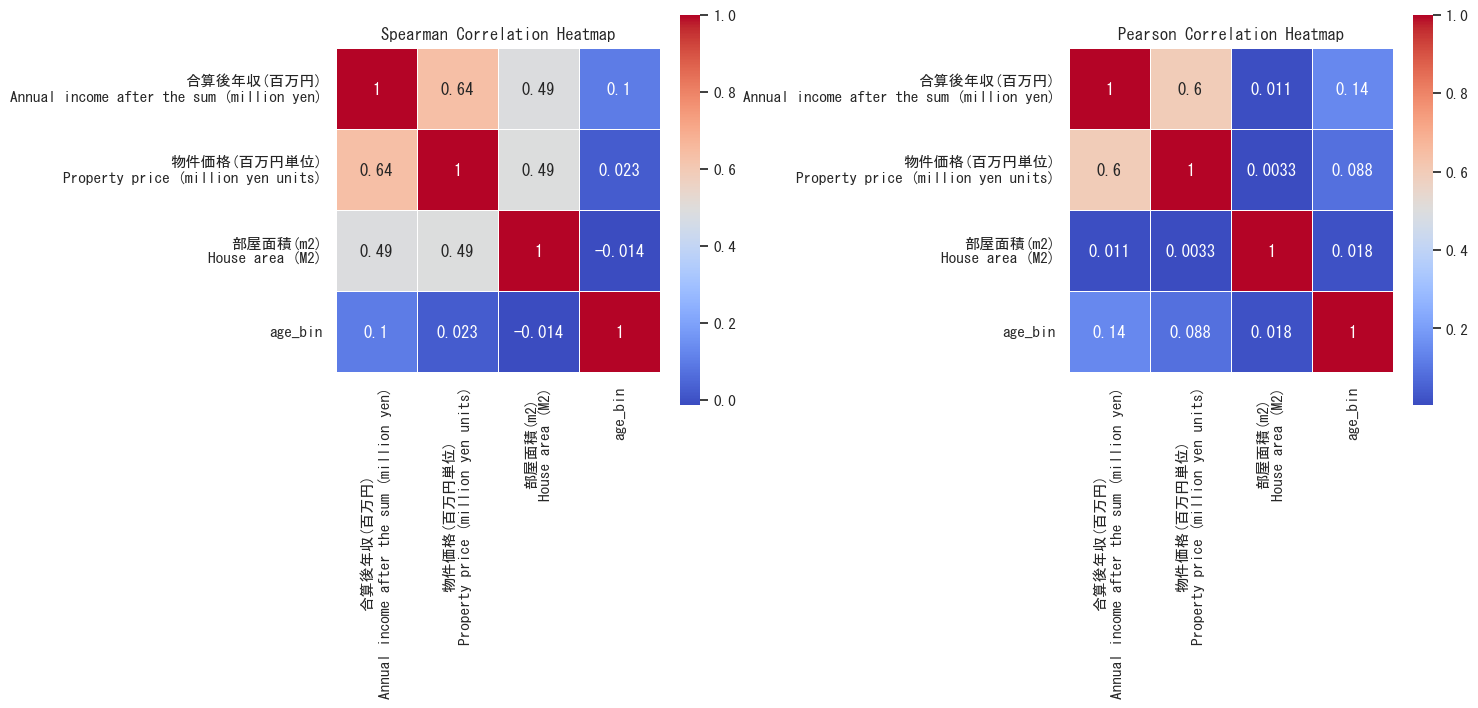

In [6]:
spearman_corr = df.iloc[:,[3,4,5,7]].corr(method='spearman')
pearson_corr = df.iloc[:,[3,4,5,7]].corr(method='pearson')

sns.set(font_scale=1.0, font="MS Gothic")
plt.figure(figsize=(15, 7))
plt.subplot(1,2,1)
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', square=True, linewidths=.5)
plt.title('Spearman Correlation Heatmap')
plt.subplot(1,2,2)
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', square=True, linewidths=.5)
plt.title('Pearson Correlation Heatmap')
plt.tight_layout()
plt.show()